In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
df_data = pd.read_csv('Dataset/clean_data.csv')
df_data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other
0,cowok usaha lacak perhati gue lantas remeh per...,1,1,1,0,0,0,0,0,1
1,telat tau edan sarap gue gaul cigax jifla cal ...,0,1,0,0,0,0,0,0,0
2,41 kadang pikir percaya tuhan jatuh kali kali ...,0,0,0,0,0,0,0,0,0
3,ku tau mata sipit,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir dongok dungu haha,1,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
13109,bicara ndasmu congor sekata anjing,1,1,1,0,0,0,1,0,0
13110,kasur enak kunyuk,0,1,0,0,0,0,0,0,0
13111,hati hati bisu bosan duh,0,0,0,0,0,0,0,0,0
13112,bom real mudah deteksi bom kubur dahsyat ledak...,0,0,0,0,0,0,0,0,0


In [3]:
x_train, x_test, y_train, y_test = train_test_split(df_data.iloc[:,0],df_data.iloc[:,1:],test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((10491,), (2623,), (10491, 9), (2623, 9))

In [4]:
EMBEDDING_DIM = 100
MAXLEN = 16
TRUNCATING = 'post'
PADDING = 'post'
OOV_TOKEN = "<OOV>"
MAX_EXAMPLES = 160000
NUM_FEATURES = 9

In [5]:
tokenizer = Tokenizer(num_words=MAX_EXAMPLES, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_train_pad = pad_sequences(x_train_seq, maxlen=MAXLEN, truncating=TRUNCATING, padding=PADDING)
x_test_seq = tokenizer.texts_to_sequences(x_test)
x_test_pad = pad_sequences(x_test_seq, maxlen=MAXLEN, truncating=TRUNCATING, padding=PADDING)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(MAX_EXAMPLES, EMBEDDING_DIM, input_length=MAXLEN),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(NUM_FEATURES, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 100)           16000000  
                                                                 
 bidirectional (Bidirectiona  (None, 16, 256)          234496    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1024)              263168    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               5

In [7]:
history = model.fit(x_train_pad, y_train, epochs=10,batch_size=64, validation_data=(x_test_pad, y_test))

Epoch 1/10
164/164 [==============================] - 11s 28ms/step - loss: 0.6678 - accuracy: 0.7915 - val_loss: 0.6401 - val_accuracy: 0.8738
Epoch 2/10
164/164 [==============================] - 3s 19ms/step - loss: 0.6146 - accuracy: 0.8582 - val_loss: 0.5846 - val_accuracy: 0.8738
Epoch 3/10
164/164 [==============================] - 3s 19ms/step - loss: 0.5582 - accuracy: 0.8562 - val_loss: 0.5239 - val_accuracy: 0.8738
Epoch 4/10
164/164 [==============================] - 3s 18ms/step - loss: 0.4981 - accuracy: 0.8570 - val_loss: 0.4636 - val_accuracy: 0.8738
Epoch 5/10
164/164 [==============================] - 3s 17ms/step - loss: 0.4475 - accuracy: 0.8560 - val_loss: 0.4220 - val_accuracy: 0.8738
Epoch 6/10
164/164 [==============================] - 3s 19ms/step - loss: 0.4195 - accuracy: 0.8392 - val_loss: 0.4040 - val_accuracy: 0.8738
Epoch 7/10
164/164 [==============================] - 3s 18ms/step - loss: 0.4093 - accuracy: 0.7941 - val_loss: 0.3978 - val_accuracy: 0.873

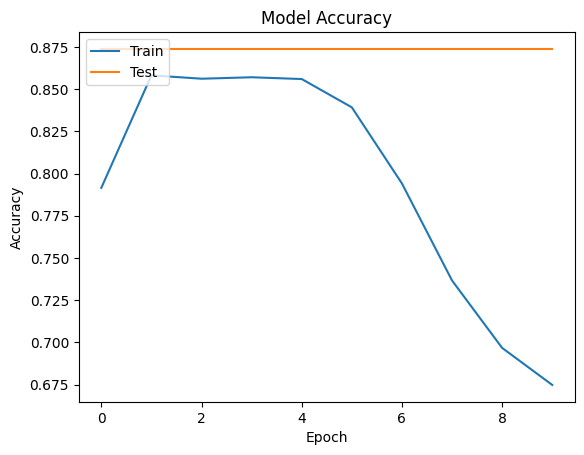

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
